In [1]:
import os as os
import numpy as np
import matplotlib.pyplot as P
from importlib import reload
import h5py
import FuncMC2d as F
import pprint

/home/vipin/ElasticString/MC2d/FuncMC2d.py:6: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)


In [2]:
from scipy.spatial import SphericalVoronoi, geometric_slerp

In [3]:
P.rc('font',size=22)
P.rc('figure',figsize=(8,6))
P.rc('figure.constrained_layout',use=True)
P.rc('xtick',direction='in')
P.rc('ytick',direction='in')
P.rc('xtick.major',size=8,width=2)
P.rc('xtick.minor',visible=True,size=4,width=1)
P.rc('ytick.major',size=8,width=2)
P.rc('ytick.minor',visible=True,size=4,width=1)

[0. 0.]
Eini/N= 0.023010726933027522
MC steps 1000
accepted moves 485
Efin/N= 1.2768677453901203e-06
Run over, go home


<IPython.core.display.Javascript object>


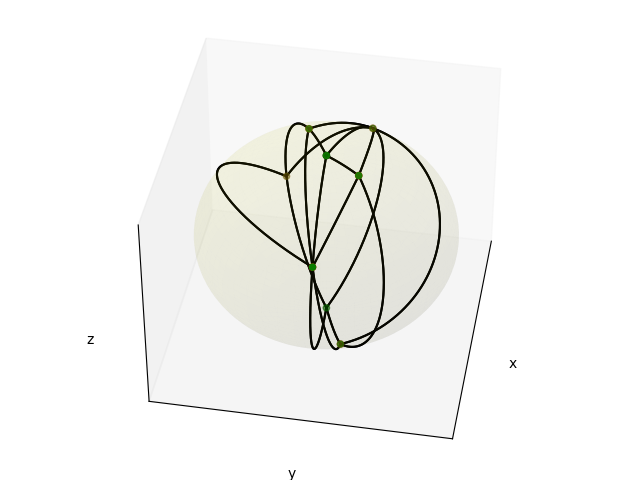

In [39]:
%matplotlib notebook
Np=8
rrini = F.rand_sph(Np)
rr = F.MC_surf(Np,Lone=np.pi,Ltwo=2*np.pi,metric='sph',maxiter=1000,kBT=1.,
                     dfac=Np,interactive=False)
sv = F.SphVoronoi(rr,lplot=True)

In [46]:
hf=h5py.File("fin_pos.h5","r")
rr=np.array(hf.get('rr'))
hf.close()

<IPython.core.display.Javascript object>


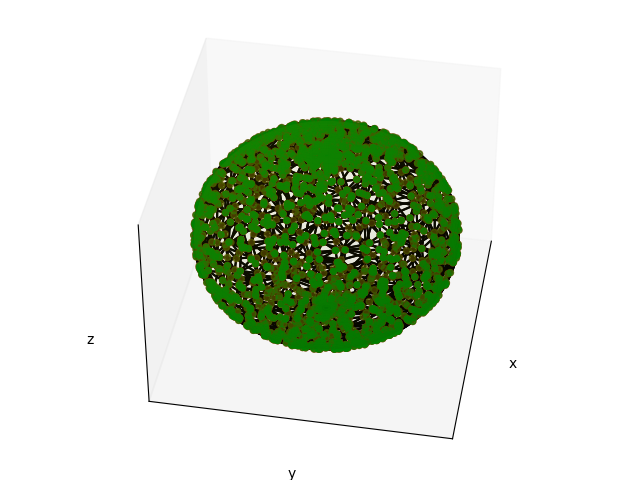

In [47]:
sv = F.SphVoronoi(rr)

In [48]:
F.assign_newmems(sv);

In [52]:
print(F.normal(sv,0))
print(sv.points[0])

[ 521  522 2004 2800 2801]
[-0.01836382 -0.010387   -0.99977742]
[0. 0. 1.]


In [54]:
print(F.normal(sv,130))
print(sv.points[130])

[ 676  677  678  679 3092 3096 3098]
[ 0.2476978   0.51352543 -0.82154576]
[ 0.20113317  0.63535779 -0.74556417]


In [58]:
print(np.linalg.norm(sv.points[34]))
print(np.linalg.norm(F.normal(sv,34)))

1.0
[ 896  897  925  926 1726 1728]
1.0


In [16]:
sv.points[2]

array([-0.59454901,  0.77539353, -0.2127824 ])

In [18]:
sv.trinrml

array([[ 0.05316685, -0.90871431, -0.41401884],
       [-0.85261315,  0.49981398, -0.15243621],
       [ 0.74687066, -0.0889042 , -0.65899944],
       ...,
       [ 0.04224838, -0.14890741,  0.98794821],
       [-0.04214715, -0.13531963,  0.98990516],
       [ 0.03000382,  0.18485801, -0.98230712]])

<IPython.core.display.Javascript object>


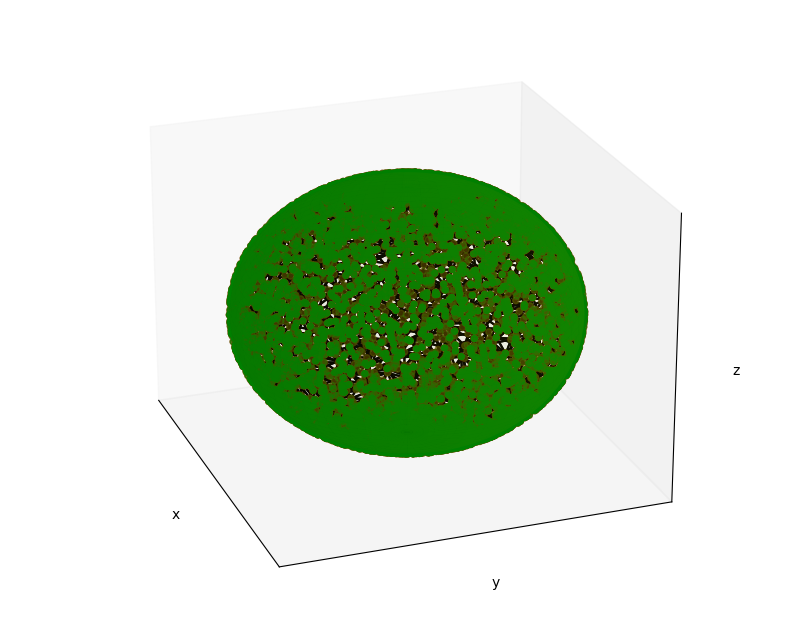

In [59]:
Np=8192
rrini = F.rand_sph(Np)
sv = F.SphVoronoi(rrini)
F.assign_newmems(sv)

In [104]:
err=0
for ip in range(Np):
    err_ip=np.linalg.norm(sv.points[ip]-sv.trinrml[F.get_tri(sv,ip)[0]])
    if err_ip>1:
        err_ip=np.linalg.norm(sv.points[ip]+sv.trinrml[F.get_tri(sv,ip)[0]])
    err=err+err_ip
err/Np

0.028809497080991273

In [114]:
err=0
for ip in range(Np):
    err=err+np.linalg.norm(sv.regions[ip]-sv.tris[sv.cntris[ip]:sv.cntris[ip+1]])
err

0.0

In [176]:
sv.points

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.22464680e-16,  0.00000000e+00, -1.00000000e+00],
       [-3.11442539e-01,  6.80431685e-01,  6.63337219e-01],
       ...,
       [-6.11140047e-01, -7.81329212e-01, -1.26619530e-01],
       [-2.84059181e-02, -6.00141531e-01, -7.99389296e-01],
       [-7.27617785e-02,  3.75907310e-01, -9.23796199e-01]])